<div class="alert alert-block alert-danger">
<b>UWAGI PROWADZĄCEGO</b> Jaki krok wybrać - dużo losowych eksperymentów - po ilu iteracjach będziemy kończyć z danym krokiem - dla mnóstwa różnych kroków; minimum, maksimum, mediany; boxplot (kwantyle) - jak się rozkłada tempo zbiegu jako można zagregować wyniki eksperymentów losowych
</div>

### Importowanie modułów

Poniżej umieszczone zostały niezbędne importy funkcji z bibliotek, które zostały wykorzystane do realizacji zadania.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# import random - nie wiem, czy się jeszcze przyda

Dla wykresu 3D będziemy również potrzebowali zaimportowania ...

In [79]:
from mpl_toolkits import mplot3d

## Funkcja f(x)

### Definicja

Definiujemy funkcję f(x) (zgodnie z treścią zawartą w zadaniu) - o nazwie *f_function*. Argumentem na wejście funkcji *f_function* jest dana zmienna niezależna (oznaczona jako *indepedent_variable*) - wartość współrzędnej x (później w kodzie będzie ona oznaczona jako m.in. *x_value*), zaś na wyjściu funkcja zwraca obliczoną zgodnie z formułą wartość zmiennej zależnej - *dependent_variable* (nazywaną później jako *y*).

In [149]:
def f_function(independent_variable):
       dependent_variable = 10*(independent_variable**4) + 3*(independent_variable**3) - 30*(independent_variable**2) + 10*independent_variable
       return dependent_variable

### Badana dziedzina oraz odpowiadający jej zbiór wartości funkcji f(x)

Tworzymy listy: 
- *x_values*, zawierającą dziedzinę - badany (interesujący nas) zakres funkcji f(x),
- *y_values*, zawierającą zbiór wartości funkcji f(x) dla danych argumentów x z *x_values*.

In [148]:
x_values = np.linspace(-3, 2.2)
y_values = [f_function(x) for x in  x_values]

#### Ustawienie rozmiaru wykresu f(x)

W tej komórce kodu jesteśmy w stanie ustawić rozmiary wykresu, w celu jak najlepszego zwizualizowania danych.

In [139]:
# plt.rcParams["figure.figsize"] = (40,20)

### Generowanie wykresu funkcji f(x)

Tworzymy wykres funkcji f(x) w celu zobrazowania jej przebiegu.

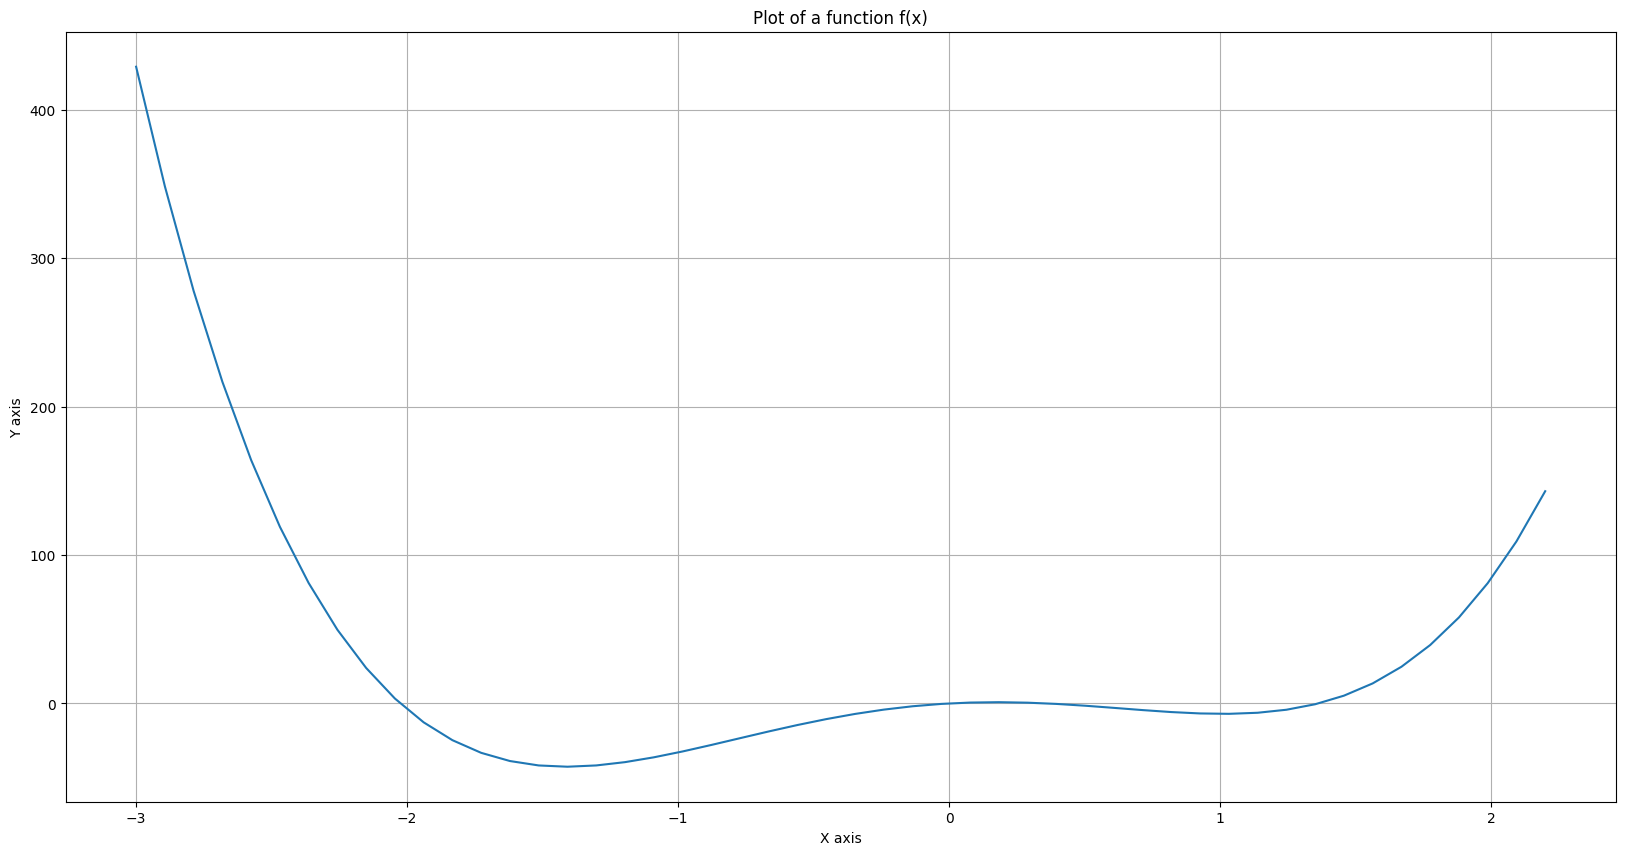

In [150]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x)')
ax.grid()


plt.show()

## Funkcja g(x)

### Definicja

Definiujemy funkcję g(x) (zgodnie z treścią zawartą w zadaniu) - o nazwie *g_function*. Argumentami na wejście funkcji *g_function* są dane zmienne niezależne (oznaczone jako first oraz second *indepedent_variable*) - wartości współrzędnej x1 oraz wartości współrzędnej x2 (które później w kodzie oznaczone są odpowiednio jako *x_value*, *y_value*), zaś na wyjściu funkcja zwraca obliczoną zgodnie z formułą wartość zmiennej zależnej - *dependent_variable* (nazywaną później jako *z*).

In [83]:
def g_function(first_independent_variable, second_independent_variable):
    dependent_variable = 10*second_independent_variable**4 + 10*first_independent_variable**4 + 3*first_independent_variable**3 - 30*first_independent_variable**2 + 10*first_independent_variable
    return dependent_variable

### Badana dziedzina oraz odpowiadający jej zbiór wartości funkcji g(x)

Tworzymy listy: 
- *x_values*, zawierającą dziedzinę pierwszej zmiennej niezależniej - badany (interesujący nas) zakres funkcji g(x, y),
- *y_values*, zawierającą dziedzinę drugiej zmiennej niezależniej - badany (interesujący nas) zakres funkcji g(x, y),
- *z_values*, zawierającą zbiór wartości funkcji g(x, y) dla danych argumentów x z *x_values* oraz y z *y_values*.

In [152]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)

#### Ustawienie rozmiaru wykresu g(x)

W tej komórce kodu jesteśmy w stanie ustawić rozmiary wykresu, w celu jak najlepszego zwizualizowania danych.

In [153]:
# plt.rcParams["figure.figsize"] = (20,10)

### Generowanie wykresu funkcji g(x)

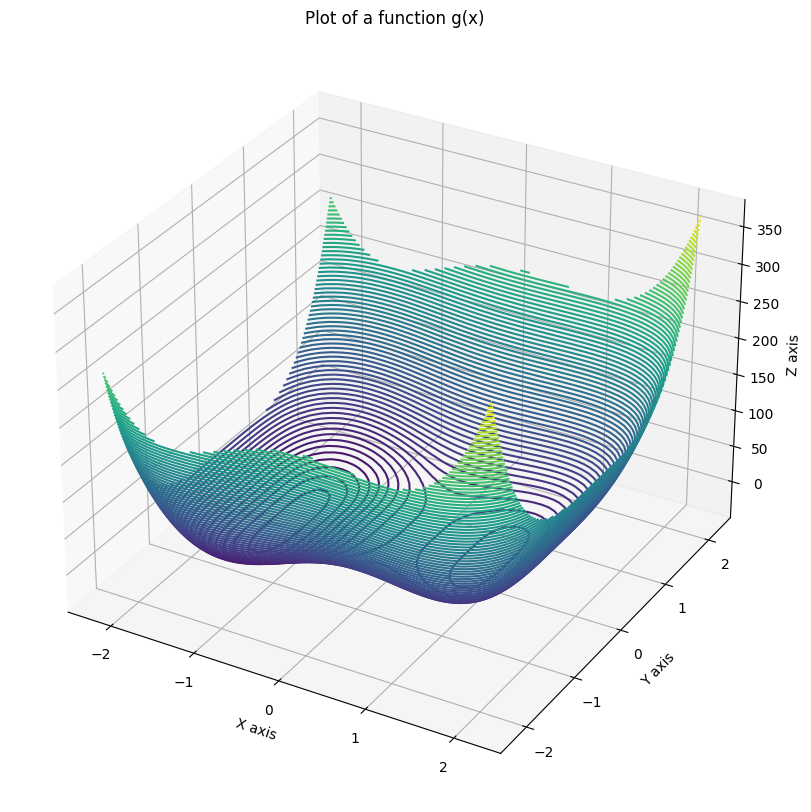

In [154]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, z_values, 100, cmap='viridis')
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')

# ax.view_init(60, 35)

plt.show()

## Algorytm najszybszego spadku

#### Warunki stopu

Warunki stopu w zaimplementowanym algorytmie to liczba iteracji (nie może zostać przekroczona podana liczba iteracji funkcji - wówczas funkcja kończy się - nie mamy jednak pewności, czy na wyjściu otrzymany punkt wykresu jest minimum lokalnym/globalnym ) oraz precyzja (algorytm pomyślnie zatrzymuje się, gdy różnica między badanym wcześniej a aktualnym punktem wykresu jest mniejsza, niż precyzja - oznacza to, że znaleźliśmy się w minimum lokalnym/globalnym).

In [118]:
stop_precision_criteria = 10**(-4)
stop_iteration_criteria = 1000
"""
na dole są podane reasonable wartości bety
"""
values_of_beta = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

#### Gradient funkcji f(x)

Zdefiniowana funkcja oblicza gradient funkcji jednej zmiennej f (formuła zgodna z treścią zadania).

In [43]:
def calculate_f_function_gradient(x_coordinate):
    return 40*x_coordinate**3 + 9*x_coordinate**2 - 60*x_coordinate + 10

#### Gradient funkcji g(x)

Zdefiniowana funkcja oblicza gradient funkcji dwóch zmiennych g (formuła zgodna z treścią zadania).

In [44]:
def calculate_g_function_gradient(x_coordinate, y_coordinate):
    return [40*x_coordinate**3 + 9*x_coordinate**2 - 60*x_coordinate + 10, 40*y_coordinate**3]

### Algorytm najszybszego spadku dla funkcji jednej zmiennej f(x)

Zaimplementowany algorytm najniższego spadku dla funkcji jednej zmiennej f(x). *gradient_descent_2d* jako argumenty przyjmuje rozmiar kroku, punkt startowy (z którego algorytm rozpoczyna "poszukiwania" minimum) oraz współczynnik betę, czyli tzw. rozmiar kroku, zaś funkcja zwraca krotkę zawierającą następujące informacje - listę punktów "przeszukanych" (lista zawiera wartości współrzędnych *x*), odnalezione minimum oraz liczbę iteracji. Ostatnie dwie informacje są zwracane jako *None*, jeżeli nie został otrzymamy pomyślny wynik działania algorytmu (liczba iteracji równa się tej, która podana została jako warunek stopu zatrzyymujący działanie algorytmu).

In [119]:
def gradient_descent_2d(step_size, starting_point_x, beta):
    iteration_counter = 0
    x_coordinates_analysed_points = [starting_point_x]
    while step_size > stop_precision_criteria and iteration_counter < stop_iteration_criteria:
        previous_x = starting_point_x
        starting_point_x = round(starting_point_x - beta * calculate_f_function_gradient(previous_x), 10)
        step_size = abs(starting_point_x - previous_x)
        iteration_counter += 1
        x_coordinates_analysed_points.append(starting_point_x)
    if iteration_counter >= stop_iteration_criteria:
        return x_coordinates_analysed_points, None, None
    else:
        return x_coordinates_analysed_points, starting_point_x, iteration_counter

### Algorytm najszybszego spadku dla funkcji dwóch zmiennych g(x)

Zaimplementowany algorytm najniższego spadku dla funkcji jednej zmiennej g(x). *gradient_descent_3d* jako argumenty przyjmuje rozmiar kroku, punkt startowy (z którego algorytm rozpoczyna "poszukiwania" minimum) oraz współczynnik betę, czyli tzw. rozmiar kroku, zaś funkcja zwraca krotkę zawierającą następujące informacje - krotkę zawierającą listy punktów "przeszukanych" (listy zawierają odpowiednio wartości współrzędnych *x* oraz *y* analizowanych punktów), odnalezione minimum oraz liczbę iteracji. Ostatnie dwie informacje są zwracane jako *None*, jeżeli nie został otrzymamy pomyślny wynik działania algorytmu (liczba iteracji równa się tej, która podana została jako warunek stopu zatrzyymujący działanie algorytmu).

In [131]:
def gradient_descent_3d(step_size, starting_point_x, starting_point_y, beta):
    iteration_counter = 0
    x_coordinates_analysed_points = [starting_point_x]
    y_coordinates_analysed_points = [starting_point_y]
    while step_size > stop_precision_criteria and iteration_counter < stop_iteration_criteria:
        previous_x = starting_point_x
        previous_y = starting_point_y
        starting_point_x = round(starting_point_x - beta * calculate_g_function_gradient(previous_x, previous_y)[0], 10)
        starting_point_y = round(starting_point_y - beta * calculate_g_function_gradient(previous_x, previous_y)[1], 10)
        step_size = max(abs(starting_point_x - previous_x), abs(starting_point_y - previous_y))
        iteration_counter +=1
        x_coordinates_analysed_points.append(starting_point_x)
        y_coordinates_analysed_points.append(starting_point_y)
    if iteration_counter >= stop_iteration_criteria:
        return (x_coordinates_analysed_points, y_coordinates_analysed_points), None, None
    else:
        return (x_coordinates_analysed_points, y_coordinates_analysed_points), (starting_point_x, starting_point_y), iteration_counter

#### Informacja o otrzymanym wyniku działania algorytmu 

In [ ]:
#dodać funkcję informującą o wyniku - jednolita, dla 2d i 3d
def algorithm_results(local_minimum):
    if local_minimum is None:
        print("The algorithm couldn't find local/global minimum - it could be due to too few performed iterations. If neccesary increase number of possible iterations.")
    else:
        

## Sprawdzenie działania zaimplementowanego algorytmu

### Dla funkcji jednej zmiennej f(x)

In [234]:
analysed_graph_points_2d, local_minimum_2d, iterations_performed_2d = gradient_descent_2d(1, -3, 0.001)
x_minimum_2d = local_minimum_2d

##### Badana dziedzina oraz odpowiadający jej zbiór wartości funkcji f(x)

In [267]:
x_values = np.linspace(-3, 2.2)
y_values = [f_function(x) for x in  x_values]

#### Wykres funkcji f(x) wraz z przebiegiem oraz wynikiem (szukanym minimum) działania algorytmu *najszybszego spadku* dla funkcji jednej zmiennej

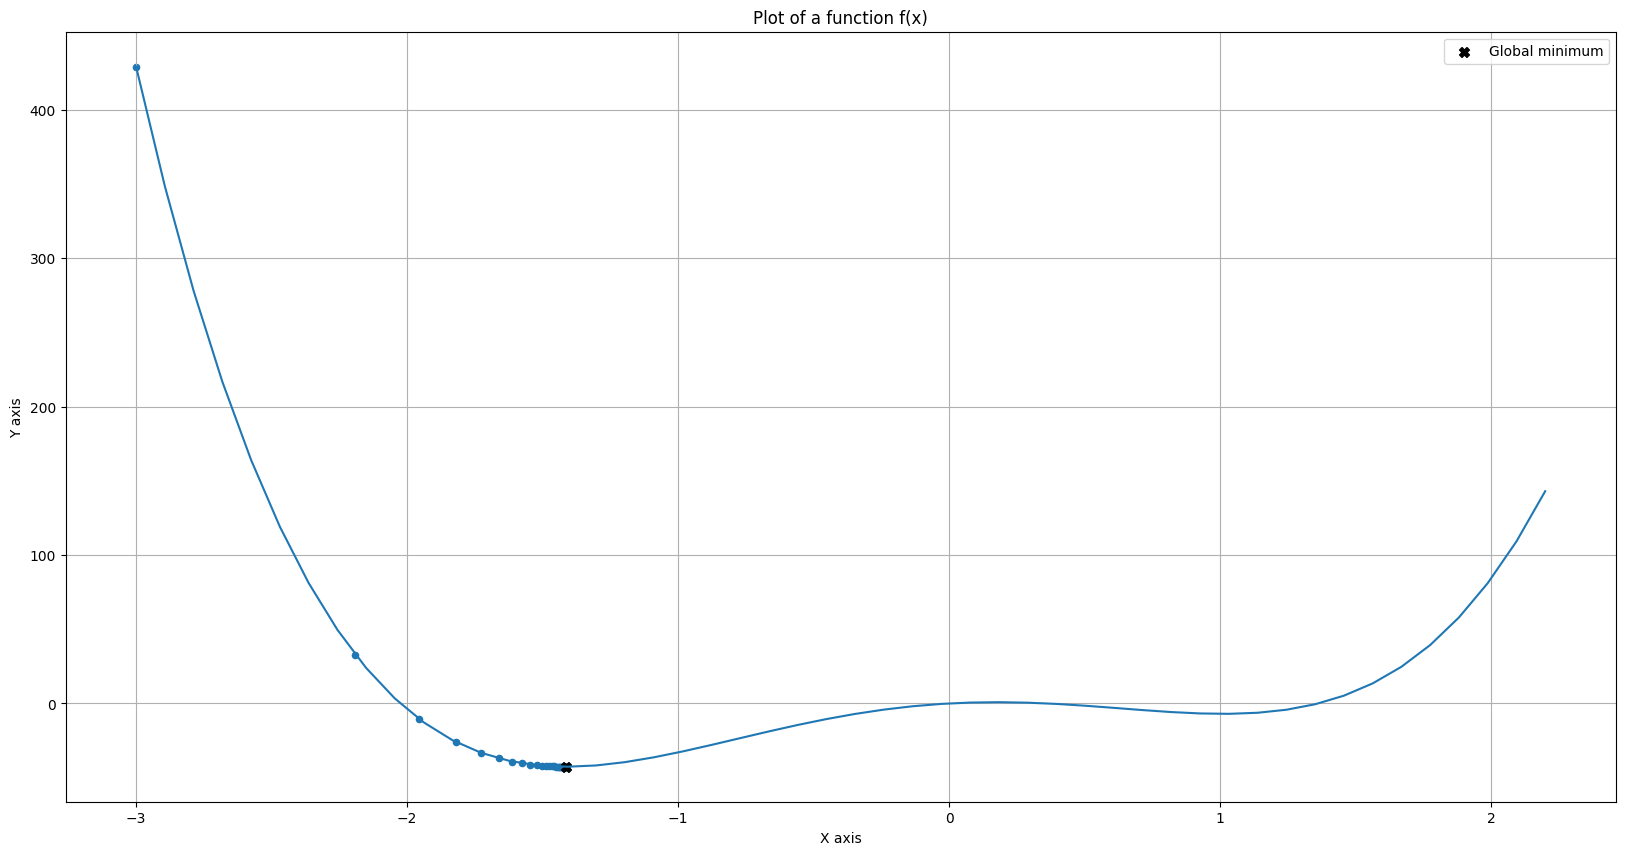

In [268]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x)')
ax.grid()

path_to_minimum = ax.scatter(analysed_graph_points_2d, [f_function(x) for x in analysed_graph_points_2d], s=20)

marked_minimum = ax.scatter(x_minimum_2d, f_function(x_minimum_2d), marker="X", c="black", label="Global minimum", s=50)
legend = ax.legend(handles=[marked_minimum], loc='upper right')

plt.show()

### Dla funkcji dwóch zmiennych g(x)

In [221]:
analysed_graph_points_3d, local_minimum_3d, iterations_performed_3d = gradient_descent_3d(1, 1, 1, 0.001)
x_minimum_3d, y_minimum_3d = local_minimum_3d
z_minimum_3d = g_function(x_minimum_3d, y_minimum_3d)

##### Badana dziedzina oraz odpowiadający jej zbiór wartości funkcji g(x)

In [391]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)

#### Wykres funkcji g(x) wraz z przebiegiem oraz wynikiem (szukanym minimum) działania algorytmu *najszybszego spadku* dla funkcji dwóch zmiennych

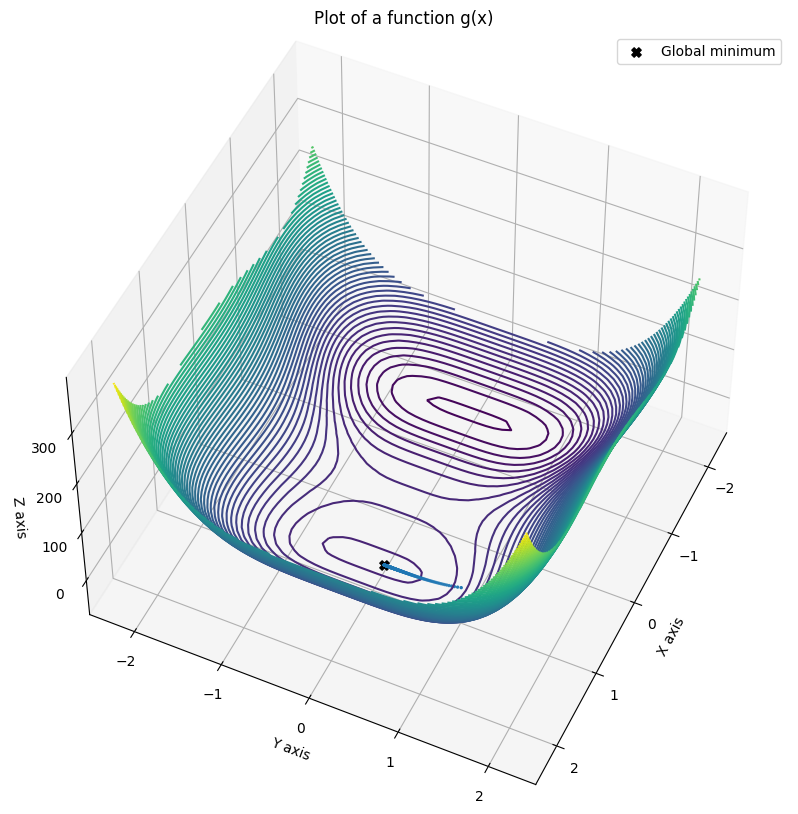

In [392]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, z_values, 75, cmap='viridis')
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')

path_to_minimum = ax.scatter(analysed_graph_points_3d[0], analysed_graph_points_3d[1], [g_function(analysed_graph_points_3d[0][i], analysed_graph_points_3d[1][i]) for i in range(0, len(analysed_graph_points_3d[0]))], s=2)

marked_minimum = ax.scatter(x_minimum_3d, y_minimum_3d, z_minimum_3d, marker="X", c="black", label="Global minimum", s=45)
legend = ax.legend(handles=[marked_minimum], loc='upper right')


ax.view_init(50, 25)
plt.show()

## Badanie wpływu rozmiaru kroku na działanie algorytmu *najszybszego spadku*

### Dla funkcji jednej zmiennej f(x)

In [472]:
x_values = np.linspace(-2, 1.5, num=1000)
y_values = [f_function(x) for x in  x_values]

In [473]:
analysed_graph_points_2d_3, local_minimum_2d_3, iterations_performed_2d_3 = gradient_descent_2d(1, -2, 0.02)
x_minimum_2d_3 = local_minimum_2d_3

analysed_graph_points_2d_4, local_minimum_2d_4, iterations_performed_2d_4 = gradient_descent_2d(1, -2, 0.01)
x_minimum_2d_4 = local_minimum_2d_4

analysed_graph_points_2d_5, local_minimum_2d_5, iterations_performed_2d_5 = gradient_descent_2d(1, -2, 0.003)
x_minimum_2d_5 = local_minimum_2d_5

analysed_graph_points_2d_6, local_minimum_2d_6, iterations_performed_2d_6 = gradient_descent_2d(1, -2, 0.001)
x_minimum_2d_6 = local_minimum_2d_6

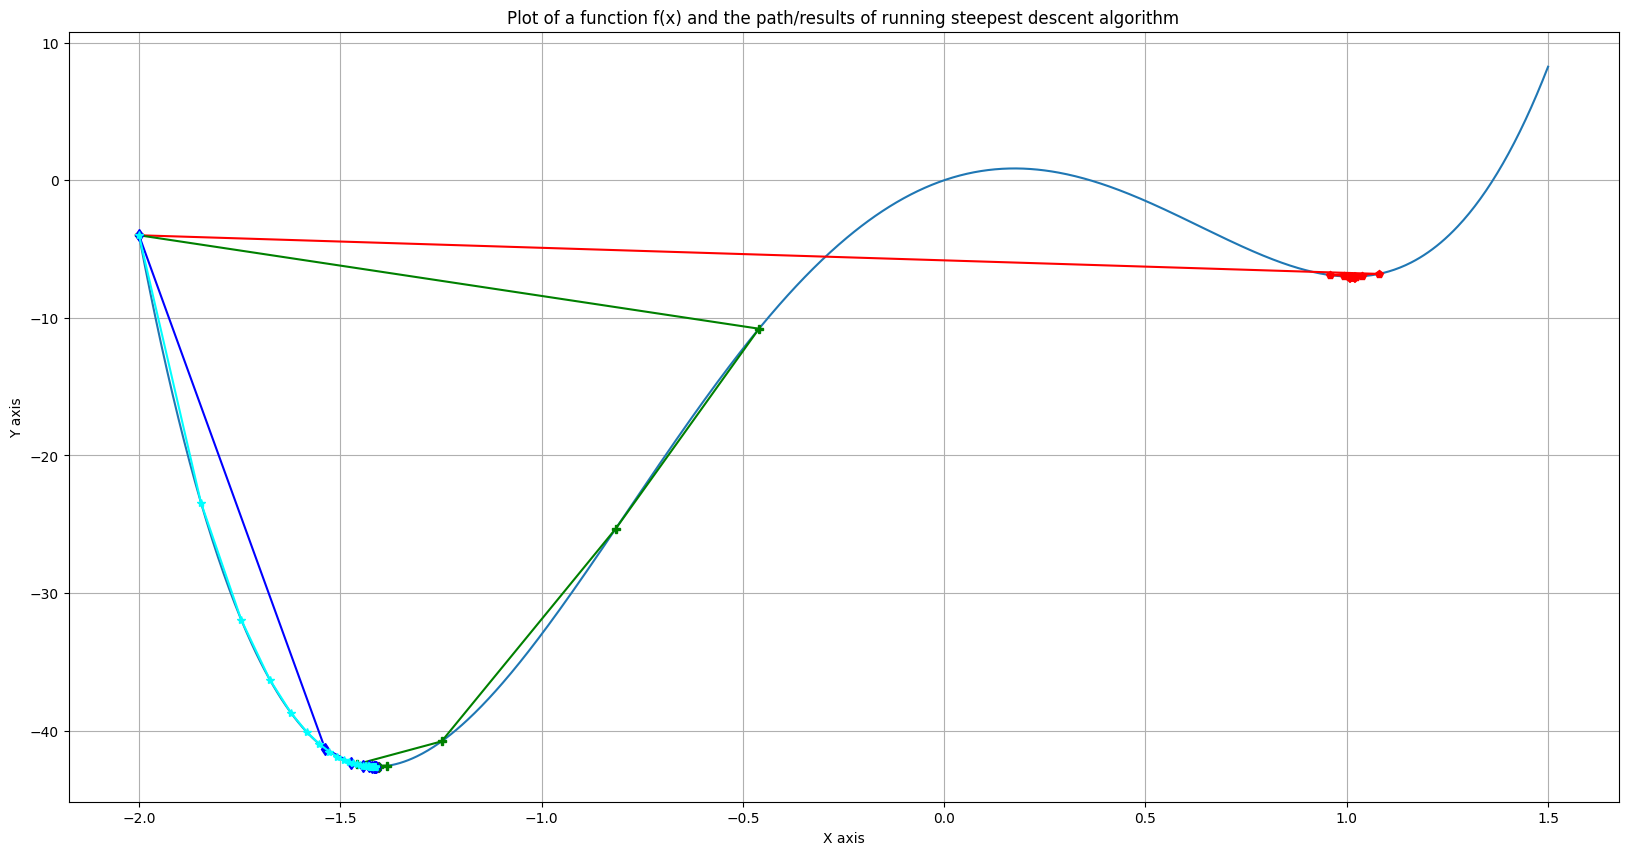

In [475]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x) and the path/results of running steepest descent algorithm')
ax.grid()


path_to_minimum_3 = ax.plot(analysed_graph_points_2d_3, [f_function(x) for x in analysed_graph_points_2d_3],  marker="p",  c="red")
marked_minimum_3 = ax.scatter(x_minimum_2d_3, f_function(x_minimum_2d_3), marker="X", c="red", label="Global minimum", s=50)


path_to_minimum_4 = ax.plot(analysed_graph_points_2d_4, [f_function(x) for x in analysed_graph_points_2d_4], marker="P",  c="green")
marked_minimum_4 = ax.scatter(x_minimum_2d_4, f_function(x_minimum_2d_4), marker="X", c="green", label="Global minimum", s=50)


path_to_minimum_5 = ax.plot(analysed_graph_points_2d_5, [f_function(x) for x in analysed_graph_points_2d_5], marker="d",  c="blue")
marked_minimum_5 = ax.scatter(x_minimum_2d_5, f_function(x_minimum_2d_5), marker="X", c="blue", label="Global minimum", s=50)


path_to_minimum_6 = ax.plot(analysed_graph_points_2d_6, [f_function(x) for x in analysed_graph_points_2d_6], marker="*",  c="cyan")
marked_minimum_6 = ax.scatter(x_minimum_2d_6, f_function(x_minimum_2d_6), marker="X", c="brown", label="Global minimum", s=50)

plt.show()


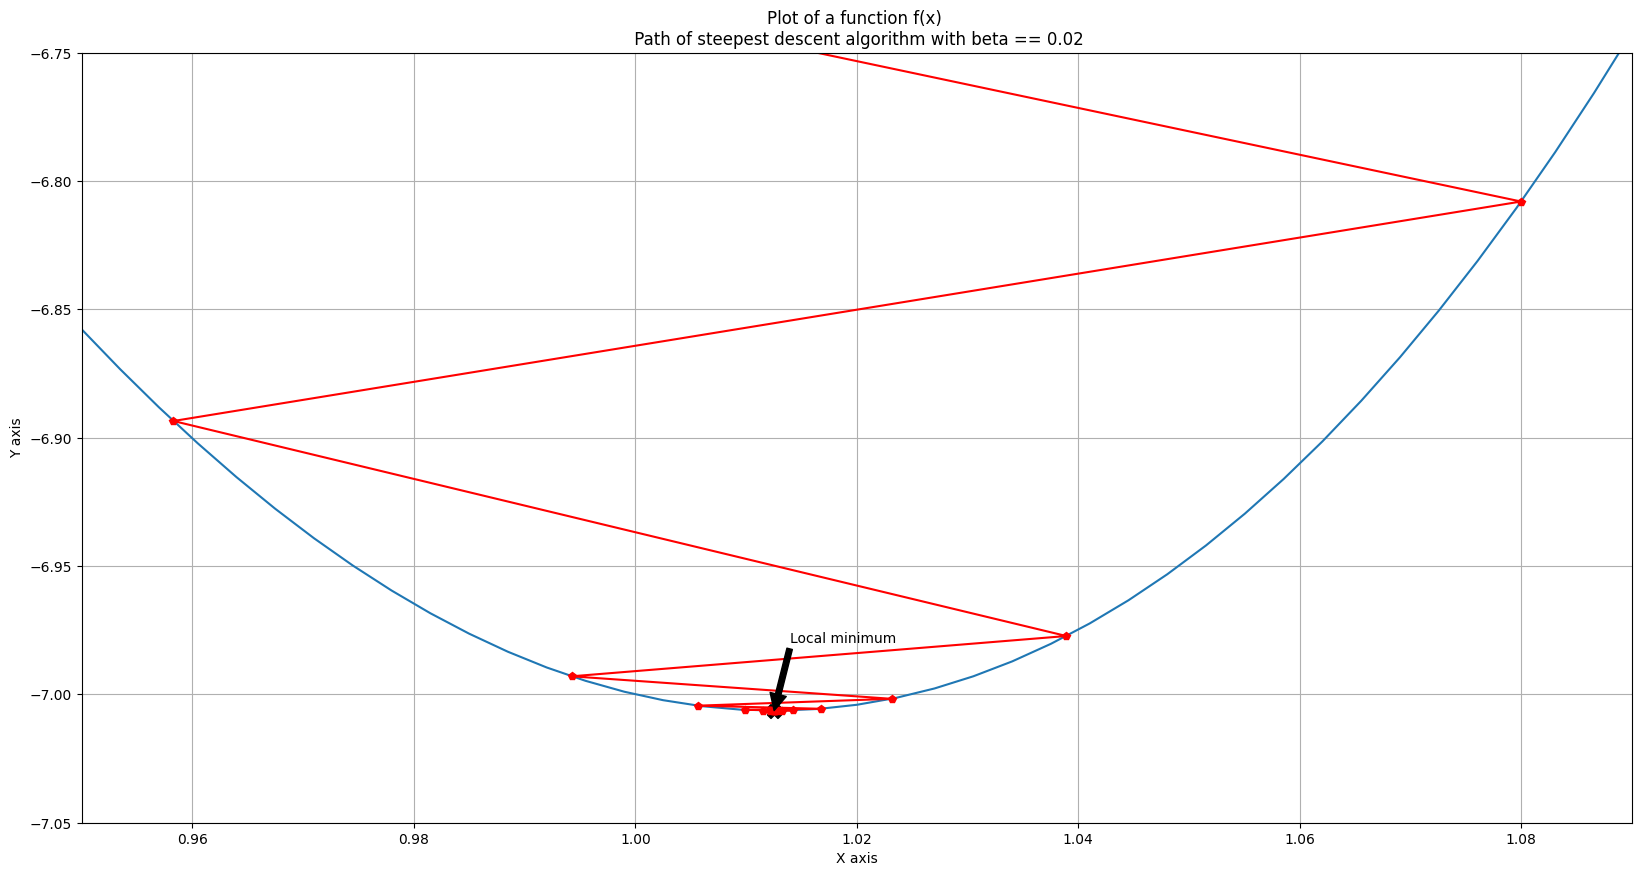

In [478]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x) \n Path of steepest descent algorithm with beta == 0.02')
ax.grid()

plt.xlim([0.95, 1.09])
plt.ylim([-7.05, -6.75])


path_to_minimum_3 = ax.plot(analysed_graph_points_2d_3, [f_function(x) for x in analysed_graph_points_2d_3],  marker="p",  c="red")
marked_minimum_3 = ax.scatter(x_minimum_2d_3, f_function(x_minimum_2d_3), marker="X", c="black", label="Global minimum", s=100)
ax = plt.annotate('Local minimum', xy =(x_minimum_2d_3, f_function(x_minimum_2d_3)), xytext =(1.014, -6.98), arrowprops = dict(facecolor ='black'))




plt.show()

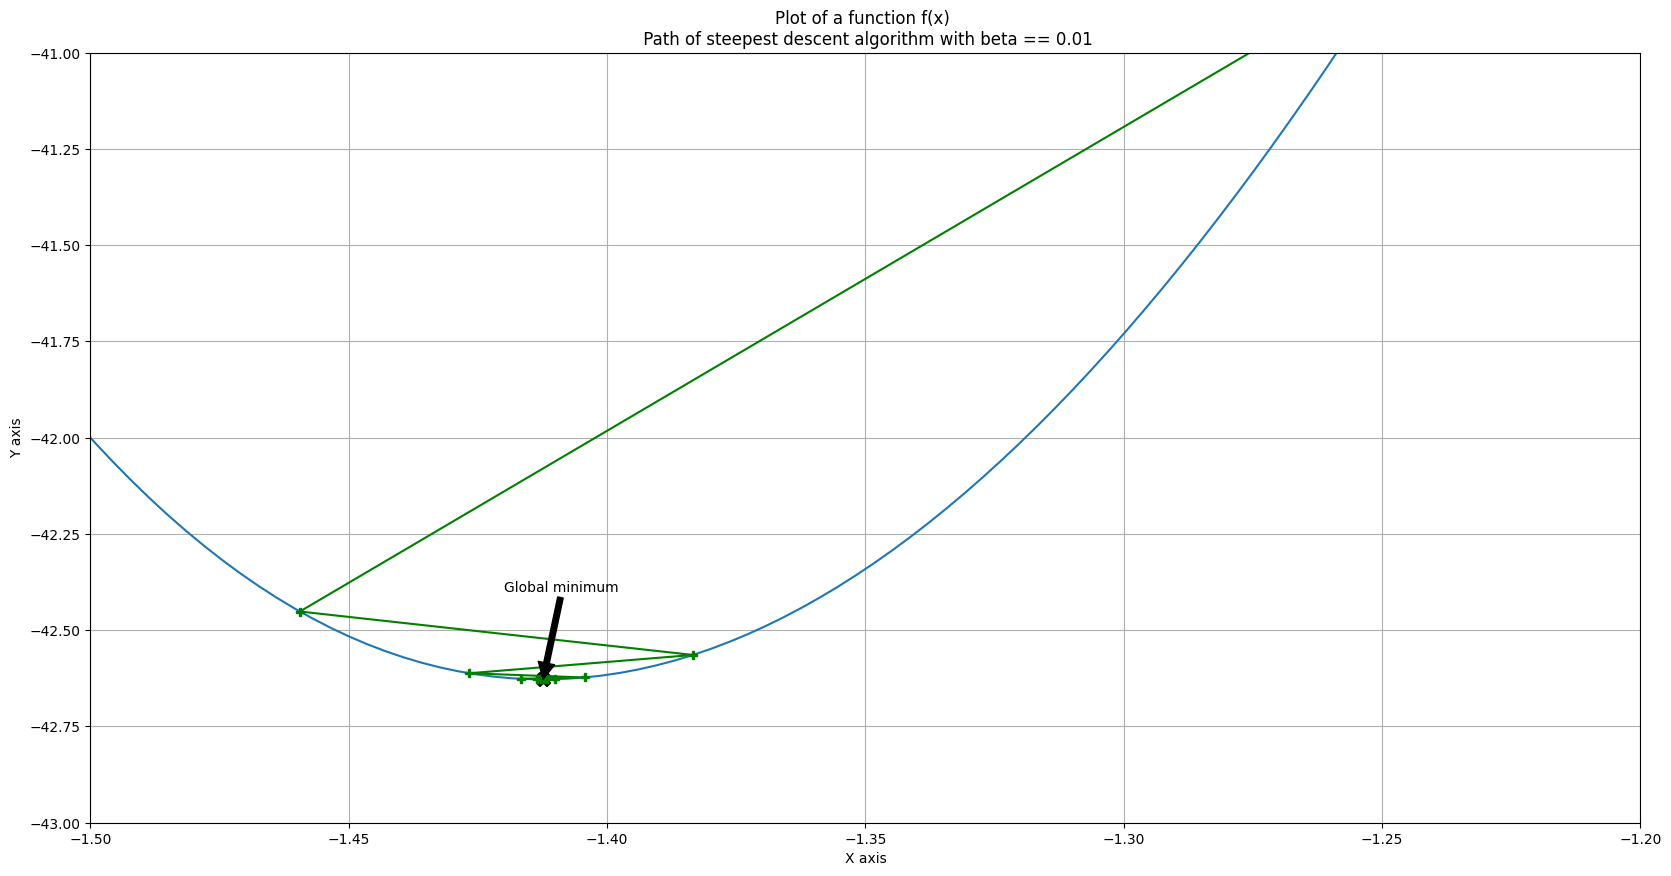

In [479]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x) \n Path of steepest descent algorithm with beta == 0.01')
ax.grid()

plt.xlim([-1.5, -1.2])
plt.ylim([-43, -41])


path_to_minimum_4 = ax.plot(analysed_graph_points_2d_4, [f_function(x) for x in analysed_graph_points_2d_4],  marker="P",  c="green")
marked_minimum_4 = ax.scatter(x_minimum_2d_4, f_function(x_minimum_2d_4), marker="X", c="black", label="Global minimum", s=100)
ax = plt.annotate('Global minimum', xy =(x_minimum_2d_4, f_function(x_minimum_2d_4)), xytext =(-1.42, -42.40), arrowprops = dict(facecolor ='black'))



plt.show()

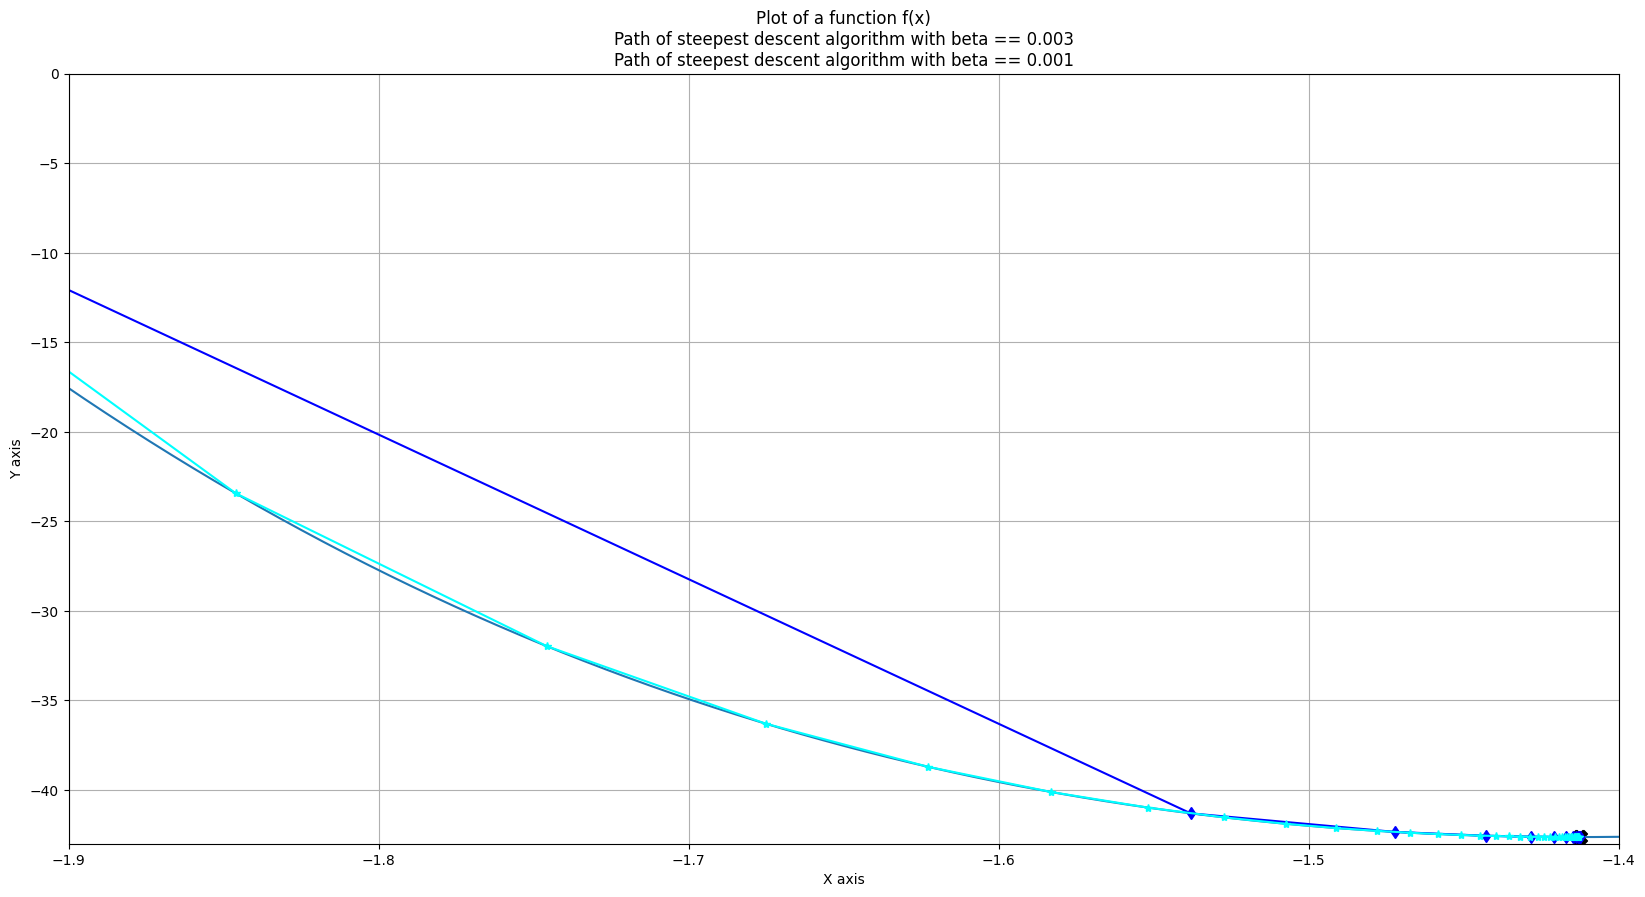

In [482]:
fig, ax = plt.subplots()

ax.plot(x_values, y_values)

ax.set(xlabel='X axis', ylabel='Y axis',
       title='Plot of a function f(x)\nPath of steepest descent algorithm with beta == 0.003\nPath of steepest descent algorithm with beta == 0.001')
ax.grid()

plt.xlim([-1.9, -1.4])
plt.ylim([-43, 0])


path_to_minimum_5 = ax.plot(analysed_graph_points_2d_5, [f_function(x) for x in analysed_graph_points_2d_5],  marker="d",  c="blue")
marked_minimum_5 = ax.scatter(x_minimum_2d_5, f_function(x_minimum_2d_5), marker="X", c="black", label="Global minimum", s=100)

path_to_minimum_6 = ax.plot(analysed_graph_points_2d_6, [f_function(x) for x in analysed_graph_points_2d_6],  marker="*",  c="cyan")
marked_minimum_6 = ax.scatter(x_minimum_2d_6, f_function(x_minimum_2d_6), marker="X", c="black", label="Global minimum", s=100)
# ax = plt.annotate('Minimum', xy =(x_minimum_2d_5, f_function(x_minimum_2d_5)), xytext =(-1.42, -42.40), arrowprops = dict(facecolor ='black'))



plt.show()

### Dla funkcji dwóch zmiennych g(x)

In [491]:
x_values = np.linspace(-2.2, 2.2)
y_values = np.linspace(-2.2, 2.2)
vector_x_value, vector_y_value = np.meshgrid(x_values, y_values)
z_values = g_function(vector_x_value, vector_y_value)

In [492]:
analysed_graph_points_3d_1, local_minimum_3d_1, iterations_performed_3d_1 = gradient_descent_3d(1, 1, 1, 0.0245)
x_minimum_3d_1, y_minimum_3d_1 = local_minimum_3d_1
z_minimum_3d_1 = g_function(x_minimum_3d_1, y_minimum_3d_1)

analysed_graph_points_3d_2, local_minimum_3d_2, iterations_performed_3d_2 = gradient_descent_3d(1, 1, 1, 0.01)
x_minimum_3d_2, y_minimum_3d_2 = local_minimum_3d_2
z_minimum_3d_2 = g_function(x_minimum_3d_2, y_minimum_3d_2)

analysed_graph_points_3d_3, local_minimum_3d_3, iterations_performed_3d_3 = gradient_descent_3d(1, 1, 1, 0.003)
x_minimum_3d_3, y_minimum_3d_3 = local_minimum_3d_3
z_minimum_3d_3 = g_function(x_minimum_3d_3, y_minimum_3d_3)

analysed_graph_points_3d_4, local_minimum_3d_4, iterations_performed_3d_4 = gradient_descent_3d(1, 1, 1, 0.001)
x_minimum_3d_4, y_minimum_3d_4 = local_minimum_3d_4
z_minimum_3d_4 = g_function(x_minimum_3d_4, y_minimum_3d_4)

Locator attempting to generate 1401 ticks ([-42.60000000000001, ..., 377.40000000000003]), which exceeds Locator.MAXTICKS (1000).


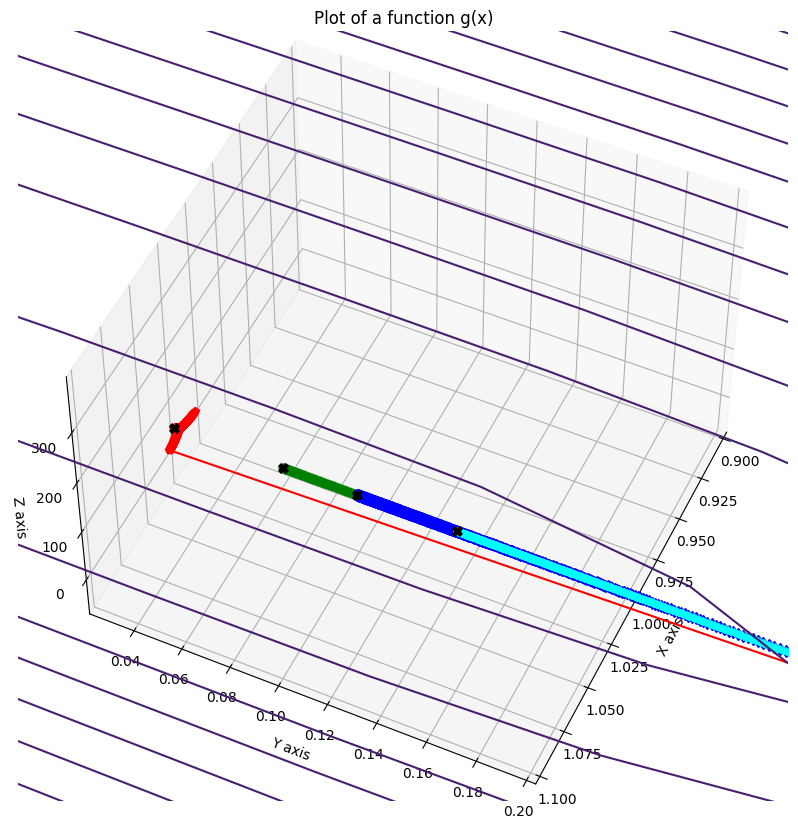

In [496]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, z_values, 1500, cmap='viridis')
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis',
       title='Plot of a function g(x)')

plt.xlim([0.9, 1.1])
plt.ylim([0.025, 0.20])


path_to_minimum_1 = ax.plot3D(analysed_graph_points_3d_1[0], analysed_graph_points_3d_1[1], [g_function(analysed_graph_points_3d_1[0][i], analysed_graph_points_3d_1[1][i]) for i in range(0, len(analysed_graph_points_3d_1[0]))], marker="p",  c="red")
marked_minimum_1 = ax.scatter(x_minimum_3d_1, y_minimum_3d_1, z_minimum_3d_1, marker="X", c="black", label="Global minimum", s=45)

path_to_minimum_2 = ax.plot3D(analysed_graph_points_3d_2[0], analysed_graph_points_3d_2[1], [g_function(analysed_graph_points_3d_2[0][i], analysed_graph_points_3d_2[1][i]) for i in range(0, len(analysed_graph_points_3d_2[0]))], marker="P",  c="green")
marked_minimum_2 = ax.scatter(x_minimum_3d_2, y_minimum_3d_2, z_minimum_3d_2, marker="X", c="black", label="Global minimum", s=45)

path_to_minimum_3 = ax.plot3D(analysed_graph_points_3d_3[0], analysed_graph_points_3d_3[1], [g_function(analysed_graph_points_3d_3[0][i], analysed_graph_points_3d_3[1][i]) for i in range(0, len(analysed_graph_points_3d_3[0]))], marker="d",  c="blue")
marked_minimum_3 = ax.scatter(x_minimum_3d_3, y_minimum_3d_3, z_minimum_3d_3, marker="X", c="black", label="Global minimum", s=45)

path_to_minimum_4 = ax.plot3D(analysed_graph_points_3d_4[0], analysed_graph_points_3d_4[1], [g_function(analysed_graph_points_3d_4[0][i], analysed_graph_points_3d_4[1][i]) for i in range(0, len(analysed_graph_points_3d_4[0]))], marker="*",  c="cyan")
marked_minimum_4 = ax.scatter(x_minimum_3d_4, y_minimum_3d_4, z_minimum_3d_4, marker="X", c="black", label="Global minimum", s=45)



ax.view_init(50, 25)
plt.show()